In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
path = "amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
#PART 1

In [5]:
# Frequency table for category
frequency_table = df["category"].value_counts()

frequency_table.head()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [6]:
categories = list(frequency_table.head().index)

In [7]:
values = [frequency_table.iloc[item] for item in range(5)]
values

[836265, 19312, 19229, 19092, 18978]

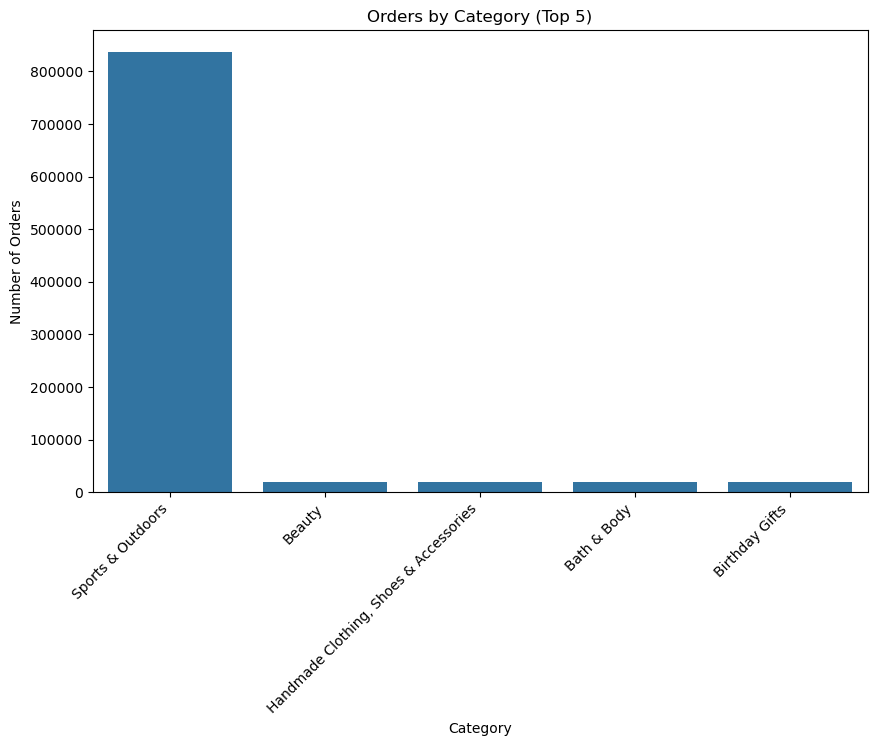

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=values)
plt.xlabel("Category")
plt.ylabel("Number of Orders")
plt.title("Orders by Category (Top 5)")
plt.xticks(rotation=45, ha="right")

plt.show()

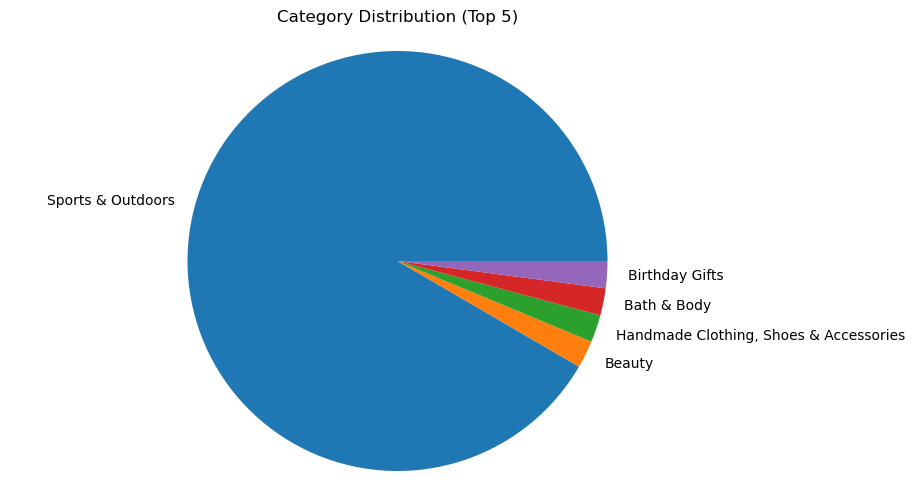

In [9]:
plt.figure(figsize=(10, 6))
plt.pie(values, labels = categories)
plt.title("Category Distribution (Top 5)")
plt.axis("equal") 
plt.show()

In [ ]:
#Does any category dominate the listings?

In [ ]:
#Yes, we can clearly see that sports & outdoors clearly dominate the listing

In [10]:
#PART 2

In [11]:
#Measures of centrality

In [12]:
df["price"].mean()

89.24380943923663

In [13]:
df["price"].median()

19.09

In [14]:
df["price"].mode()[0]

9.99

In [15]:
#What's the average price point of products listed? 
#How does this compare with the most common price point (mode)?

In [ ]:
#The average price point is 89,24£
#The mode is 9,99£
#Because mean>median>mode, we can say it has a positive skew (to the right)

In [16]:
#Measures of dispersion

In [17]:
df["price"].var()

119445.48532256528

In [18]:
df["price"].std()

345.60886175352226

In [19]:
#Range
df["price"].max() - df["price"].min()

100000.0

In [20]:
#Inter Quantile Range (IQR)
q3, q1 = np.percentile(df["price"], [75, 25])
iqr = q3 - q1
iqr

36.0

In [21]:
#How varied are the product prices? 
#Are there any indicators of a significant spread in prices?

In [53]:
df["price"].kurt()

4241.616412866518

In [22]:
#The prices are very varied, the range in huge (100.000£)
#The kurtosis = 4241 which meands its very diverse, and that it has many outliers.


45.99

In [23]:
#Visualizations

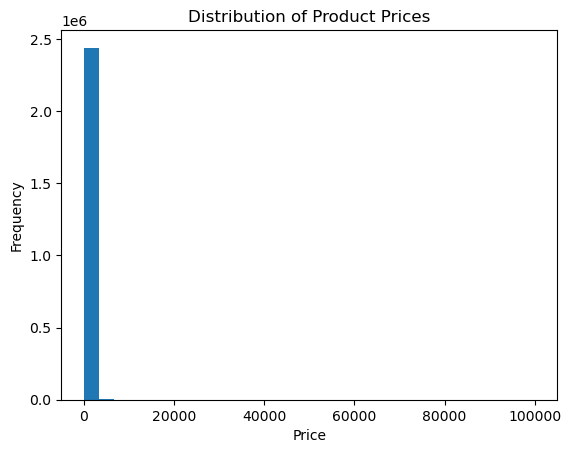

In [24]:
# Plotting the histogram
plt.hist(df["price"], bins=30)
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [25]:
#It's nearly impossible to read the histogram. this is because 75% of the products cost less than 45.99£ and the price range goes to 100000£.
#Also because the frequency scale is too big.

In [26]:
#A possible way to improve the readability is to remove the outliers that are causing the positive skeweness.

In [64]:
limited_range = df[df["price"] <= 100]

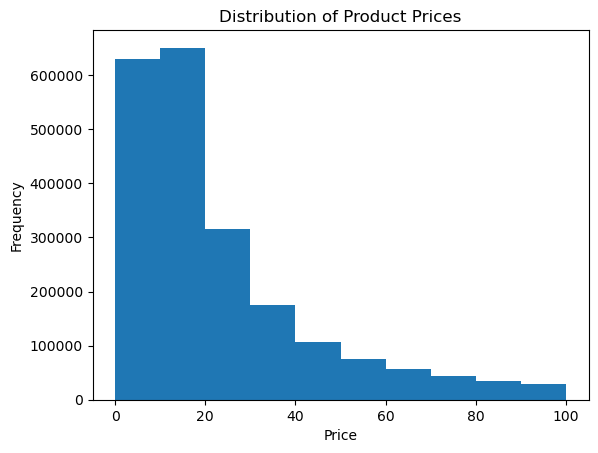

In [65]:
#Possible solution
plt.hist(limited_range["price"], bins=10)

plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

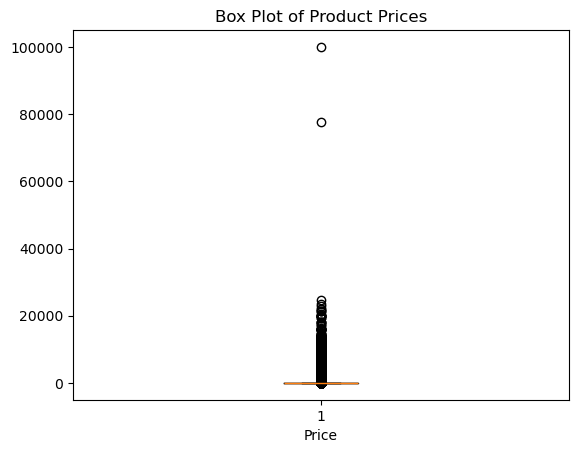

In [29]:
plt.boxplot(df["price"])
plt.title("Box Plot of Product Prices")
plt.xlabel("Price")
plt.show()

In [30]:
#As we can see in the previous box plot, there majority of products form a cluster with a small IQR.

#There are some important outliers (indicating a significant spread).

#There are products priced significantly higher than the rest.

In [31]:
#PART 3

In [32]:
#Measures of centrality

In [33]:
df["stars"].mean()

2.152836472966065

In [34]:
df["stars"].median()

0.0

In [35]:
df["stars"].mode()[0]

0.0

In [40]:
#Measures of dispersion

In [43]:
df["stars"].var()

4.81743402976196

In [44]:
df["stars"].std()

2.1948653785054697

In [45]:
df["stars"].max() - df["stars"].min()

5.0

In [46]:
q3, q1 = np.percentile(df["stars"], [75, 25])
iqr = q3 - q1
iqr

4.4

In [47]:
#Ratings are inconsistent, there is a wide variation in customer feedback as we can see with the std and the IQR.
#However, we must keep in mind that 0 stars is the default for products that have no yet been rated. 

(4.4, 0.0)

In [41]:
#Shape of the distribution

In [48]:
#Skewness --> We have a positive skewness, which means the mean>median>mode
df['stars'].skew()

0.08120735761080985

In [49]:
#Kurtosis We have a negative kurtosis wich means there are fewer outliers. The shape is flatter
df['stars'].kurtosis()

-1.9260061280432985

In [ ]:
#Visualizations

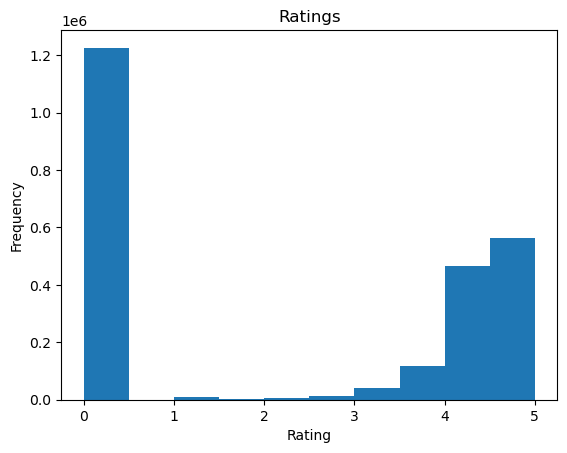

In [52]:
plt.hist(df["stars"], bins=10)
plt.title("Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#As we can see in the histogram, most ratigns are between 0 and 0.5 followed by 4.5 to 5 and 4 to 4.5.